# **Article 120 : Vectorized Strings Opertions & DateTime in Pandas** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DS-Python/blob/main/Pandas/Notebooks/120_vectorized_strings_datetime.ipynb)

|🔴 **NOTE** 🔴|
|:-----------:|
|This notebook contains the practical implementations of the concepts discussed in the following article.|
| Here is Article 120 - [Vectorized Strings Opertions & DateTime in Pandas](../Articles/120_vectorized_strings_datetime.md) |

### 📦 **Importing Relevant Libraries**

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### ⚠️ **Data Warning**
For the code ahead we will be using the `tips` data of a restaurant from `seaborn` library and `expense_data.csv` which is in [Resources](../Resources/Data/) folder.

#### **Reading Data into DataFrame**

In [3]:
tips_df = sns.load_dataset('tips')

In [29]:
expense_df = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/expense_data.csv'
)

### 🚀 **Pivot Table**

#### **1. Tips Data from Seaborn**

Trying to find out the Average Bill Value Based on Sex and Smoker

In [ ]:
sex_smoker_pt = tips_df.pivot_table(
    values = 'total_bill',
    index = 'sex',
    columns = 'smoker',
    observed = False
)

In [16]:
'Average Bill Value of Female Smoker = ' + str(
        sex_smoker_pt.loc['Female', 'Yes'].round(decimals = 2)
)

'Average Bill Value of Female Smoker = 17.98'

In [20]:
'Average Bill Value of Female Non-Smoker = ' + str(
        sex_smoker_pt.loc['Female', 'No'].round(decimals = 2)
)

'Average Bill Value of Female Non-Smoker = 18.11'

In [19]:
'Average Bill Value of Male Smoker = ' + str(
        sex_smoker_pt.loc['Male', 'Yes'].round(decimals = 2)
)

'Average Bill Value of Male Smoker = 22.28'

In [21]:
'Average Bill Value of Male Non-Smoker = ' + str(
        sex_smoker_pt.loc['Male', 'No'].round(decimals = 2)
)

'Average Bill Value of Male Non-Smoker = 19.79'

Let's Try to Find out Average Bill Value, Tip, and Size Based on Sex and Smoker

In [23]:
all_sex_smoker_pt = tips_df.pivot_table(
    values = ['total_bill', 'tip', 'size'],
    index = 'sex',
    columns = 'smoker',
    observed = False
)

In [24]:
all_sex_smoker_pt

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

Now let's take an example that allows us to analyze values on our own choice of function.

In [26]:
tips_df.pivot_table(
    values = [
        'total_bill',
        'tip',
        'size'
    ],
    index = 'sex',
    columns = 'smoker',
    aggfunc = {
        'total_bill' : 'sum',
        'tip' : 'max',
        'size': ['min', 'max']
    },
    observed = False
)

size             tip      total_bill         
        max    min      max             sum         
smoker  Yes No Yes No   Yes   No        Yes       No
sex                                                 
Male      5  6   1  2  10.0  9.0    1337.07  1919.75
Female    4  6   1  1   6.5  5.2     593.27   977.68

In [28]:
tips_df.pivot_table(
    values = [
        'total_bill',
        'tip',
        'size'
    ],
    index = [
      'sex',
      'day'  
    ],
    columns = 'smoker',
    aggfunc = {
        'total_bill' : 'sum',
        'tip' : 'max',
        'size': ['min', 'max']
    },
    observed = False
)

size              tip       total_bill        
             max    min       max              sum        
smoker       Yes No Yes No    Yes    No        Yes      No
sex    day                                                
Male   Thur    4  6   2  2   5.00  6.70     191.71  369.73
       Fri     4  2   1  2   4.73  3.50     163.62   34.95
       Sat     5  4   2  2  10.00  9.00     589.62  637.73
       Sun     5  6   2  2   6.50  6.00     392.12  877.34
Female Thur    4  6   2  1   5.00  5.17     134.53  400.36
       Fri     2  3   2  2   4.30  3.25      88.58   38.73
       Sat     4  4   1  1   6.50  4.67     304.00  247.05
       Sun     3  5   2  2   4.00  5.20      66.16  291.54

Now, we have Average Bill Value Based on Sex and Smoker (including categories and for All values)

In [35]:
tips_df.pivot_table(
    values = 'total_bill',
    index = 'sex',
    columns = 'smoker',
    margins = True,
    observed = False
)

smoker,Yes,No,All
sex,,,
Male,22.284500,19.791237,20.744076
Female,17.977879,18.105185,18.056897
All,20.756344,19.188278,19.785943


#### **2. Expense Data**

In [46]:
expense_df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


Let's drop some unuseful and redundant columns from the `expense_df`.

In [52]:
expense_df.drop(
    columns = [
        'Account.1',
        'Note.1',
        'Subcategory'
    ],
    inplace = True
)

Checking if the drop worked properly.

In [53]:
expense_df

,Date,Account,Category,Note,INR,Income/Expense,Amount,Currency
0,3/2/2022 10:11,CUB - online payment,Food,Brownie,50.0,Expense,50.0,INR
1,3/2/2022 10:11,CUB - online payment,Other,To lended people,300.0,Expense,300.0,INR
2,3/1/2022 19:50,CUB - online payment,Food,Dinner,78.0,Expense,78.0,INR
3,3/1/2022 18:56,CUB - online payment,Transportation,Metro,30.0,Expense,30.0,INR
4,3/1/2022 18:22,CUB - online payment,Food,Snacks,67.0,Expense,67.0,INR
...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,Dinner,90.0,Expense,90.0,INR
273,11/22/2021 14:16,CUB - online payment,Food,Lunch with company,97.0,Expense,97.0,INR
274,11/21/2021 17:07,CUB - online payment,Transportation,Rapido,130.0,Expense,130.0,INR
275,11/21/2021 15:50,CUB - online payment,Food,Lunch,875.0,Expense,875.0,INR


Converting the `Date` column into `DateTime` dtype.

In [54]:
expense_df['Date'] = pd.to_datetime(
    expense_df['Date']
)

Checking

In [55]:
expense_df.Date.dtype

dtype('<M8[ns]')

Let's create some more columns using `Date` column so the analysis gets better.

In [81]:
expense_df['Month'] = expense_df['Date'].dt.month_name()
expense_df['Year'] = expense_df['Date'].dt.year

Now, let's perform some Analysis on it using `pivot_table()` function.

Here, the below code gets us a summary of person's expense pattern based on Category and Month.

In [78]:
month_cat_exp_summary = expense_df.pivot_table(
    values = 'INR',
    index = 'Month',
    columns = 'Category',
    observed = False,
    aggfunc = 'sum',
    fill_value = 0.0
)
month_cat_exp_summary

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


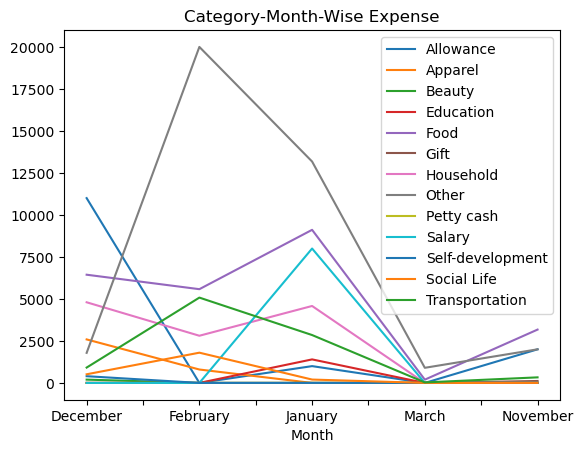

In [ ]:
month_cat_exp_summary.plot(
    kind = 'line'
)
plt.title('Category-Month-Wise Expense')
plt.show()

In [86]:
year_cat_exp_summary = expense_df.pivot_table(
    values = 'INR',
    index = 'Year',
    columns = 'Category',
    observed = False,
    aggfunc = 'sum',
    fill_value = 0.0
)
year_cat_exp_summary

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Year,,,,,,,,,,,,,
2021,13000.0,2590.0,196.0,0.0,9615.12,115.0,4800.0,3790.0,3.0,0.0,400.0,513.72,1245.0
2022,1000.0,798.0,0.0,1400.0,14887.36,0.0,7388.0,34078.0,0.0,8000.0,0.0,2000.00,7958.8


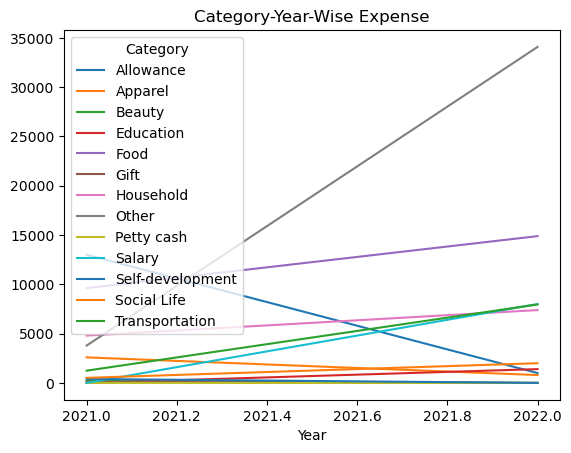

In [87]:
year_cat_exp_summary.plot(
    kind = 'line'
)
plt.title('Category-Year-Wise Expense')
plt.show()

In [90]:
exp_inc_summary_df = expense_df.pivot_table(
    values = 'INR',
    index = 'Month',
    columns = 'Income/Expense',
    observed = False
)
exp_inc_summary_df

Income/Expense,Expense,Income
Month,,
December,212.135584,1025.833333
February,372.180208,3033.333333
January,299.703043,853.956522
March,105.000000,300.000000
November,113.137500,1334.333333


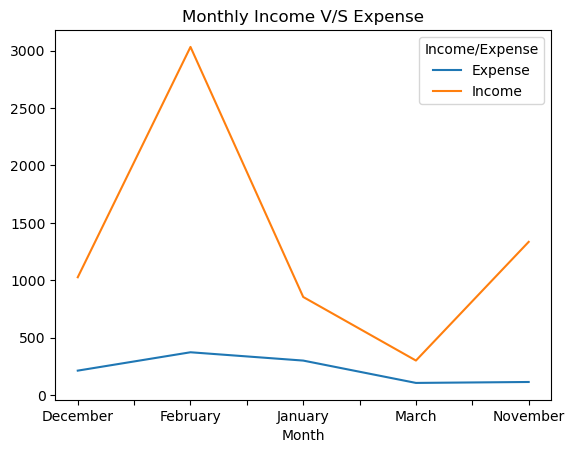

In [92]:
exp_inc_summary_df.plot(
    kind = 'line'
)
plt.title('Monthly Income V/S Expense')
plt.show()

### **📦 Vectorized Operations**

In [96]:
salaries = pd.Series(
    data = [50000, 60000, 70000]
)
increased = salaries * 1.1
increased

0    55000.0
1    66000.0
2    77000.0
dtype: float64

In [97]:
marks = np.array([50, 60, 70, 80, 90])
grace_marks =  5
new_marks = marks + grace_marks
new_marks

array([55, 65, 75, 85, 95])

#### ⚠️ **Problems with Vectorized Operations in Vanilla Python**

##### **Vanilla Python does not support Vectorized Operations**

👎 **WRONG WAY**  
  
Throws a TypeError during execution.

In [108]:
salaries1 = [50000, 60000, 70000]
try :
    increased1 = salaries1 * 1.1
    print(increased1)
except Exception as e:
    print(e)

can't multiply sequence by non-int of type 'float'


👍 **RIGHT WAY**  
  
Though it tries to mimic vectorized operations, it is not as fast and efficient as vectorized operations.

In [103]:
salaries = [50000, 60000, 70000]
increased = [round(s * 1.1, ndigits = 2) for s in salaries]
increased

[55000.0, 66000.0, 77000.0]

#### 💡 **The Solution - Pandas Data Structures**

Pandas is built on NumPy, which offers:

- Typed arrays
- Efficient memory layout
- Compiled C backend

In [109]:
a = pd.Series([1, 2, 3])
b = pd.Series([4, 5, 6])
result = a + b
result

0    5
1    7
2    9
dtype: int64

### ⚠️ **Data Warning**
For the code ahead we will be using the `titanic.csv` which is in [Resources](../Resources/Data/) folder.

#### **Reading Data into DataFrame**

In [110]:
titanic_df = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/titanic.csv'
)

### 🚀 **Vectorized String Operations**

#### 📦 **str Accessor**

In [ ]:
a_mask = titanic_df['Name'].str.startswith('A')
titanic_df['Name'][a_mask].size

#### 📦 **lower() method**

In [122]:
titanic_df['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

#### 📦 **upper() method**

In [124]:
titanic_df['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

#### 📦 **capitalize() method**

In [125]:
titanic_df['Name'].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

#### 📦 **title() method**

In [126]:
titanic_df['Name'].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

#### 📦 **len() method**

In [134]:
titanic_df[titanic_df['Name'].str.len() == titanic_df['Name'].str.len().max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9,C65,C


#### 📦 **strip() method**

In [135]:
name = '           Abbas             '
name.strip()

'Abbas'

In [136]:
titanic_df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

#### 📦 **split() method**

In [139]:
titanic_df['Name'].str.split(
    pat = ','
).str.get(0)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [149]:
salutations = titanic_df['Name'].str.split(
    pat = ','
).str.get(1).str.strip().str.split(
    pat = ' ',
    n = 1
).str.get(0)

salutations.value_counts()

Name
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

#### 📦 **replace() method**

In [152]:
salutations = salutations.str.replace(
    pat = 'Ms.',
    repl = 'Miss.'
)

salutations.value_counts()

Name
Mr.          517
Miss.        183
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

#### 📦 **startswith() method**

In [154]:
titanic_df[titanic_df['Name'].str.startswith('John')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### 📦 **endswith() method**

In [155]:
titanic_df[titanic_df['Name'].str.endswith('John')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S


#### 📦 **isdigit() method**

In [158]:
titanic_df['Name'].str.isdigit().sum()

0

#### 📦 **isalpha() method**

In [160]:
titanic_df['Name'].str.isalpha().sum()

0

#### 📦 **pandas.contains() method**

In [163]:
titanic_df[titanic_df['Name'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S


In [164]:
titanic_df[titanic_df['Name'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 🚀 **Timestamp Object in Pandas**

#### 📦 **Timestamp Creation (Date)**

In [172]:
pd.Timestamp(
    ts_input = '2025-06-04'
)

Timestamp('2025-06-04 00:00:00')

In [173]:
pd.Timestamp(
    ts_input = '2025/06/04'
)

Timestamp('2025-06-04 00:00:00')

In [174]:
pd.Timestamp(
    ts_input = '2025, 06, 04'
)

Timestamp('2025-06-04 00:00:00')

In [175]:
pd.Timestamp(
    ts_input = '4th June 2025'
)

Timestamp('2025-06-04 00:00:00')

In [178]:
pd.Timestamp(
    ts_input = '4th June, 2025'
)

Timestamp('2025-06-04 00:00:00')

In [176]:
pd.Timestamp(
    ts_input = 'June 04 2025'
)

Timestamp('2025-06-04 00:00:00')

In [177]:
pd.Timestamp(
    ts_input = 'June 04, 2025'
)

Timestamp('2025-06-04 00:00:00')

In [191]:
pd.Timestamp(
    ts_input = '2025'
)

Timestamp('2025-01-01 00:00:00')

In [192]:
pd.Timestamp(
    ts_input = '2025-06'
)

Timestamp('2025-06-01 00:00:00')

In [197]:
pd.Timestamp(
    ts_input = dt.datetime(
        year = 2025,
        month = 6,
        day = 4
    )
)

Timestamp('2025-06-04 00:00:00')

In [200]:
pd.Timestamp(
    ts_input = 1748995200,
    unit = 's'
)

Timestamp('2025-06-04 00:00:00')

In [203]:
pd.Timestamp(
    ts_input = 1748995200000,
    unit = 'ms'
)

Timestamp('2025-06-04 00:00:00')

In [190]:
pd.Timestamp(
    year = 2025,
    month = 6,
    day = 4
)

Timestamp('2025-06-04 00:00:00')

#### 📦 **Timestamp Creation (Date + Time)**

In [186]:
pd.Timestamp(
    ts_input = '2025-06-04T2145'
)

Timestamp('2025-06-04 21:45:00')

In [187]:
pd.Timestamp(
    ts_input = '2025-06-04 21:45'
)

Timestamp('2025-06-04 21:45:00')

In [188]:
pd.Timestamp(
    ts_input = '2025/06/04 21:45'
)

Timestamp('2025-06-04 21:45:00')

In [189]:
pd.Timestamp(
    ts_input = '2025/06/04 9:45PM'
)

Timestamp('2025-06-04 21:45:00')

In [205]:
pd.Timestamp(
    ts_input = '2025, 06, 04, 21:45'
)

Timestamp('2025-06-04 21:45:00')

In [206]:
pd.Timestamp(
    ts_input = '2025, 06, 04T21:45'
)

Timestamp('2025-06-04 21:45:00')

In [212]:
pd.Timestamp(
    ts_input = 1749056951,
    unit = 's'
)

Timestamp('2025-06-04 17:09:11')

In [214]:
pd.Timestamp(
    year = 2025,
    month = 6,
    day = 4,
    hour = 21,
    minute = 45
)

Timestamp('2025-06-04 21:45:00')

#### 📦 **Vectorized Timestamp Operations**

In [220]:
month_start = np.array('2025-06-01', dtype = np.datetime64)
days = np.arange(30)
month_dates =  month_start + days
month_dates

array(['2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04',
       '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08',
       '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
       '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
       '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
       '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
       '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
       '2025-06-29', '2025-06-30'], dtype='datetime64[D]')

### 🚀 **DatetimeIndex Object in Pandas**

#### 📦 **From Strings**

In [227]:
month_dates_dt_index = pd.DatetimeIndex(
    data = [
        '2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04',
        '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08',
        '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
        '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
        '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
        '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
        '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
        '2025-06-29', '2025-06-30'
    ]
)

#### 📦 **From Timestamps**

In [224]:
pd.DatetimeIndex(
    data = [
        pd.Timestamp('2025-06-01'),
        pd.Timestamp('2025-06-02'),
        pd.Timestamp('2025-06-03'),
        pd.Timestamp('2025-06-04')
    ]
)

DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04'], dtype='datetime64[ns]', freq=None)

#### 📦 **Using DatetimeIndex as Series Index**

In [230]:
pd.Series(
    data = month_dates_dt_index.day_of_week,
    index = month_dates_dt_index,
    name = 'WeekDay'
)

2025-06-01    6
2025-06-02    0
2025-06-03    1
2025-06-04    2
2025-06-05    3
2025-06-06    4
2025-06-07    5
2025-06-08    6
2025-06-09    0
2025-06-10    1
2025-06-11    2
2025-06-12    3
2025-06-13    4
2025-06-14    5
2025-06-15    6
2025-06-16    0
2025-06-17    1
2025-06-18    2
2025-06-19    3
2025-06-20    4
2025-06-21    5
2025-06-22    6
2025-06-23    0
2025-06-24    1
2025-06-25    2
2025-06-26    3
2025-06-27    4
2025-06-28    5
2025-06-29    6
2025-06-30    0
Name: WeekDay, dtype: int32

#### 📦 **Using DatetimeIndex as DataFrame Index**

In [232]:
pd.DataFrame(
    data = {
        'Year' : month_dates_dt_index.year,
        'Month' : month_dates_dt_index.month_name(),
        'Day' : month_dates_dt_index.day,
        'Day Name' : month_dates_dt_index.day_name()
    },
    index = month_dates_dt_index,
    
)

,Year,Month,Day,Day Name
2025-06-01,2025,June,1,Sunday
2025-06-02,2025,June,2,Monday
2025-06-03,2025,June,3,Tuesday
2025-06-04,2025,June,4,Wednesday
2025-06-05,2025,June,5,Thursday
2025-06-06,2025,June,6,Friday
2025-06-07,2025,June,7,Saturday
2025-06-08,2025,June,8,Sunday
2025-06-09,2025,June,9,Monday
2025-06-10,2025,June,10,Tuesday


### 🚀 **pandas.date_range() function**

#### 📦 **Generate Dates between Two Dates**

In [233]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30'
)

DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04',
               '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08',
               '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
               '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
               '2025-06-29', '2025-06-30'],
              dtype='datetime64[ns]', freq='D')

#### 📦 **Parameter : freq**  
See the Offset Aliases List for allowed values of *freq* parameter. [Offset Aliases List](https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases)

In [235]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30',
    freq = '2D',
    name = 'Alternate Dates'
)

DatetimeIndex(['2025-06-01', '2025-06-03', '2025-06-05', '2025-06-07',
               '2025-06-09', '2025-06-11', '2025-06-13', '2025-06-15',
               '2025-06-17', '2025-06-19', '2025-06-21', '2025-06-23',
               '2025-06-25', '2025-06-27', '2025-06-29'],
              dtype='datetime64[ns]', name='Alternate Dates', freq='2D')

In [240]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30',
    freq = 'B',
    name = 'Business Dates'
)

DatetimeIndex(['2025-06-02', '2025-06-03', '2025-06-04', '2025-06-05',
               '2025-06-06', '2025-06-09', '2025-06-10', '2025-06-11',
               '2025-06-12', '2025-06-13', '2025-06-16', '2025-06-17',
               '2025-06-18', '2025-06-19', '2025-06-20', '2025-06-23',
               '2025-06-24', '2025-06-25', '2025-06-26', '2025-06-27',
               '2025-06-30'],
              dtype='datetime64[ns]', name='Business Dates', freq='B')

In [242]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30',
    freq = 'W',
    name = 'Weekly Sunday Dates'
)

DatetimeIndex(['2025-06-01', '2025-06-08', '2025-06-15', '2025-06-22',
               '2025-06-29'],
              dtype='datetime64[ns]', name='Weekly Sunday Dates', freq='W-SUN')

In [243]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30',
    freq = 'W-FRI',
    name = 'Weekly Friday Dates'
)

DatetimeIndex(['2025-06-06', '2025-06-13', '2025-06-20', '2025-06-27'], dtype='datetime64[ns]', name='Weekly Friday Dates', freq='W-FRI')

In [248]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30',
    freq = 'h',
    name = 'Hourly Dates'
)

DatetimeIndex(['2025-06-01 00:00:00', '2025-06-01 01:00:00',
               '2025-06-01 02:00:00', '2025-06-01 03:00:00',
               '2025-06-01 04:00:00', '2025-06-01 05:00:00',
               '2025-06-01 06:00:00', '2025-06-01 07:00:00',
               '2025-06-01 08:00:00', '2025-06-01 09:00:00',
               ...
               '2025-06-29 15:00:00', '2025-06-29 16:00:00',
               '2025-06-29 17:00:00', '2025-06-29 18:00:00',
               '2025-06-29 19:00:00', '2025-06-29 20:00:00',
               '2025-06-29 21:00:00', '2025-06-29 22:00:00',
               '2025-06-29 23:00:00', '2025-06-30 00:00:00'],
              dtype='datetime64[ns]', name='Hourly Dates', length=697, freq='h')

In [250]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30',
    freq = 'ME',
    name = 'Month End Dates'
)

DatetimeIndex(['2025-06-30'], dtype='datetime64[ns]', name='Month End Dates', freq='ME')

In [251]:
pd.date_range(
    start = '2025-06-01',
    end = '2025-06-30',
    freq = 'MS',
    name = 'Month Start Dates'
)

DatetimeIndex(['2025-06-01'], dtype='datetime64[ns]', name='Month Start Dates', freq='MS')

In [ ]:
pd.date_range(
    start = '2025-06-01',
    end = '2030-06-30',
    freq = 'YE',
    name = 'Year End December Dates'
)

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31'],
              dtype='datetime64[ns]', name='Year End Dates', freq='YE-DEC')

In [255]:
pd.date_range(
    start = '2025-06-01',
    end = '2030-06-30',
    freq = 'YE-JUN',
    name = 'Year End June Dates'
)

DatetimeIndex(['2025-06-30', '2026-06-30', '2027-06-30', '2028-06-30',
               '2029-06-30', '2030-06-30'],
              dtype='datetime64[ns]', name='Year End June Dates', freq='YE-JUN')

In [256]:
pd.date_range(
    start = '2025-06-01',
    end = '2030-06-30',
    freq = 'YS-JUN',
    name = 'Year Start June Dates'
)

DatetimeIndex(['2025-06-01', '2026-06-01', '2027-06-01', '2028-06-01',
               '2029-06-01', '2030-06-01'],
              dtype='datetime64[ns]', name='Year Start June Dates', freq='YS-JUN')

#### 📦 **Parameter : periods**

### 🚀 **pandas.date_range() function**

In [257]:
pd.date_range(
    start = '2025-06-01',
    periods = 30
)

DatetimeIndex(['2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04',
               '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08',
               '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
               '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
               '2025-06-29', '2025-06-30'],
              dtype='datetime64[ns]', freq='D')

In [260]:
pd.date_range(
    start = '2025-06-01',
    periods = 12,
    freq = 'ME'
)

DatetimeIndex(['2025-06-30', '2025-07-31', '2025-08-31', '2025-09-30',
               '2025-10-31', '2025-11-30', '2025-12-31', '2026-01-31',
               '2026-02-28', '2026-03-31', '2026-04-30', '2026-05-31'],
              dtype='datetime64[ns]', freq='ME')

### ⚠️ **Data Warning**
For the code ahead we will be using the `expense_data.csv` which is in [Resources](../Resources/Data/) folder.

#### **Reading data into DataFrame**

In [261]:
expense_df = pd.read_csv(
    filepath_or_buffer = '../Resources/Data/expense_data.csv'
)

### 🚀 **pandas.to_datetime() function**

#### 📦 **Scalar Series to Timestamp Series**

In [262]:
pd.to_datetime(
    arg = expense_df.Date
)

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]